# import the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


# LOADING THE DATASET

In [17]:
data=pd.read_csv('C:/Users/DELL/Desktop/churn customer analysis.csv')
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# DATA CLEANING

In [21]:
data.shape

(7043, 21)

In [23]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [27]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
data.isnull().sum().sum()


0

In [35]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
data['customerID'].duplicated().sum()



0

In [30]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
data.value_counts('gender')

gender
Male      3555
Female    3488
Name: count, dtype: int64

# Data Visualization

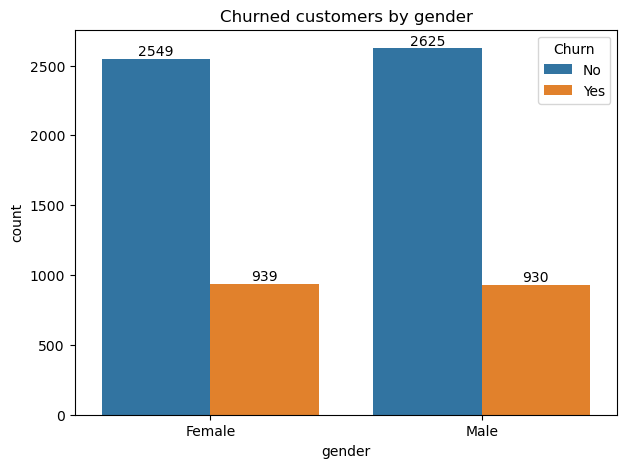

In [36]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x='gender',data=data,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned customers by gender')
plt.show()

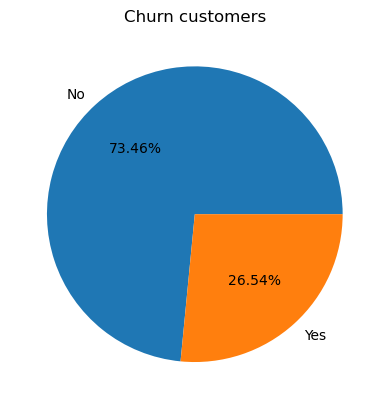

In [38]:
gb=data.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title('Churn customers')
plt.show()

In [40]:
data.value_counts('SeniorCitizen')

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

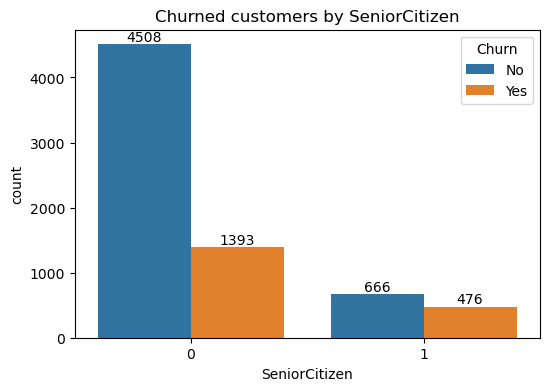

In [42]:
 plt.figure(figsize=(6,4))
ax=sns.countplot(x='SeniorCitizen',data=data,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned customers by SeniorCitizen')
plt.show()

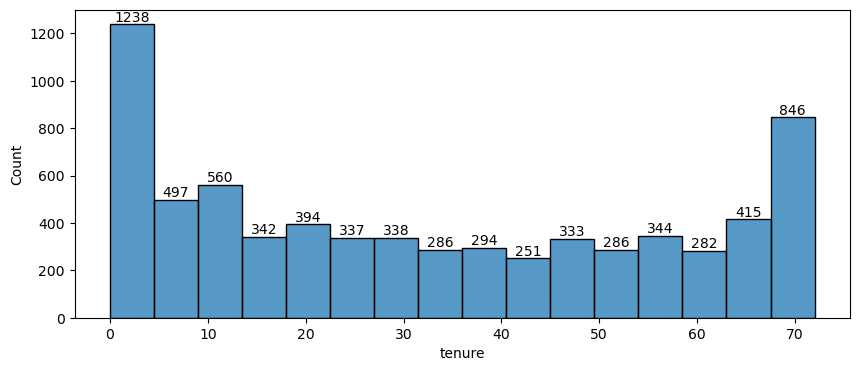

In [44]:
plt.figure(figsize=(10,4))
ax=sns.histplot(x='tenure',data=data)
ax.bar_label(ax.containers[0])
plt.show()

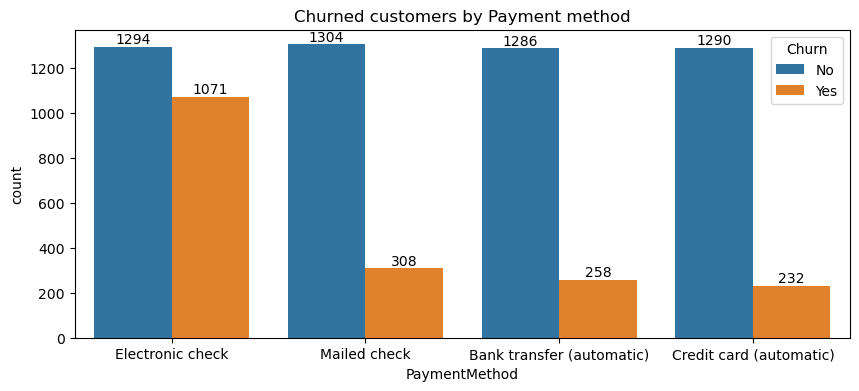

In [46]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='PaymentMethod',data=data,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned customers by Payment method')
plt.show()

In [48]:
pip install category_Encoders

Note: you may need to restart the kernel to use updated packages.


In [270]:
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [138]:
y = data['Churn']
x = data.drop(['customerID','Churn'],axis=1)

In [140]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

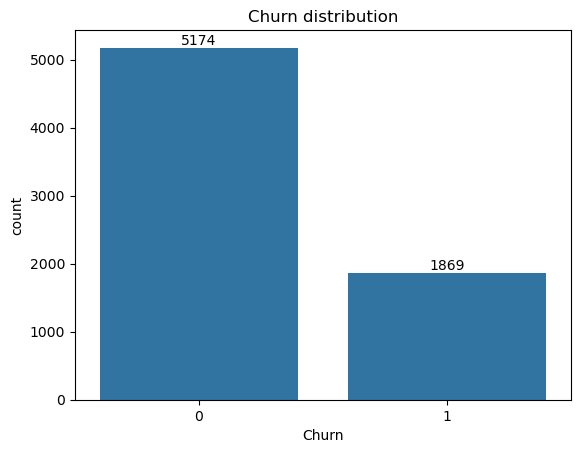

In [142]:
ax = sns.countplot(x='Churn',data=data)
ax.bar_label(ax.containers[0])
plt.title('Churn distribution')
plt.show()

In [218]:
features_num=['tenure','MonthlyCharges','TotalCharges']

In [220]:
features_cat = ['gender', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling','PaymentMethod']

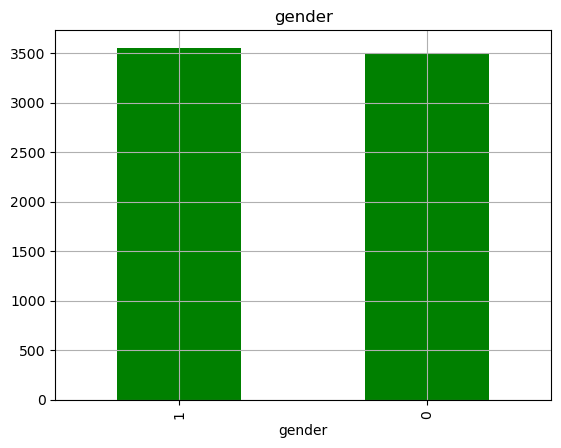

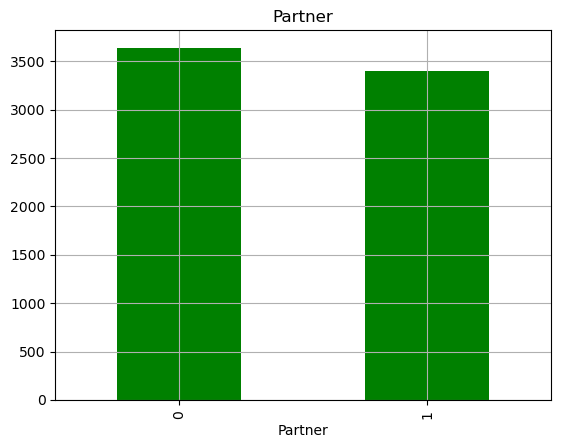

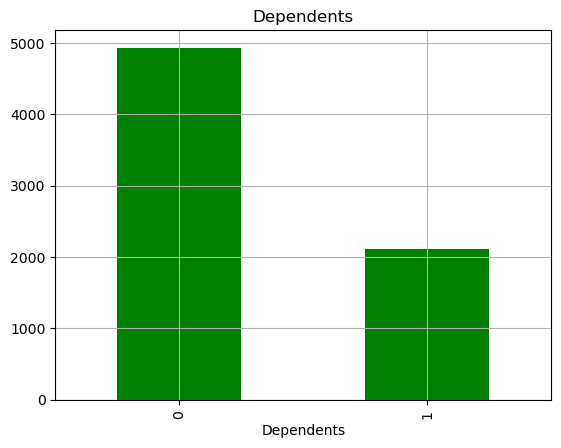

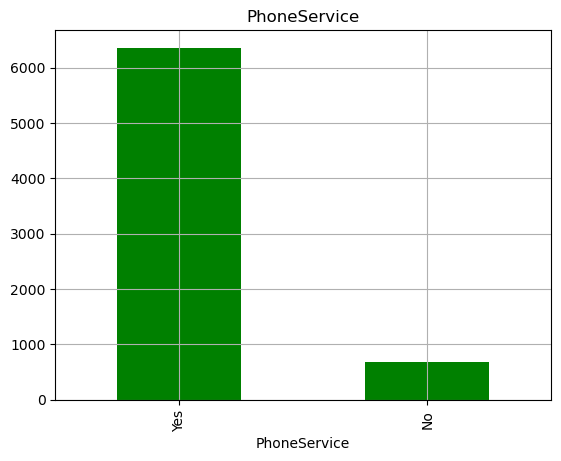

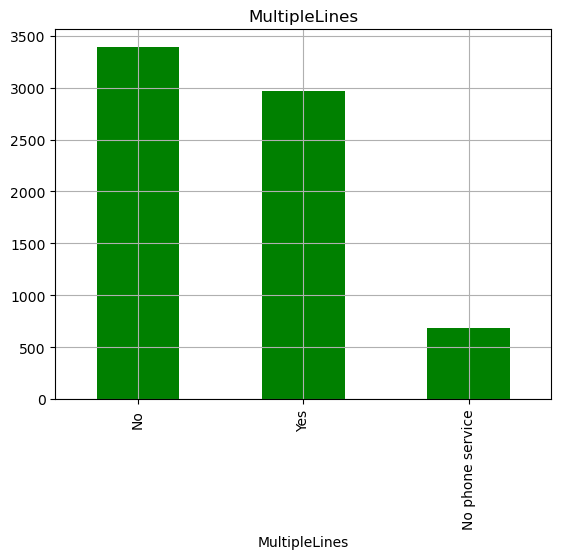

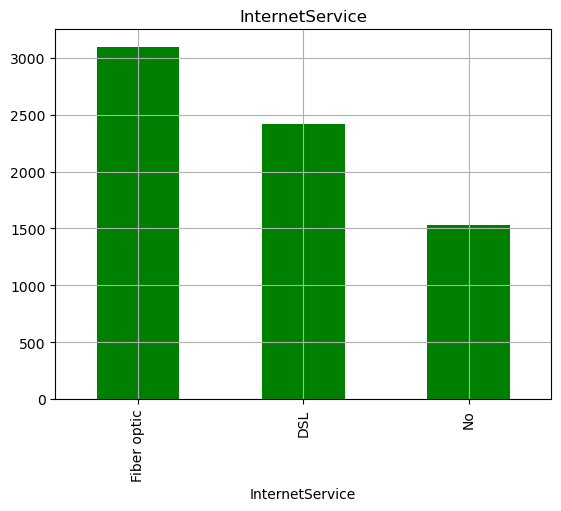

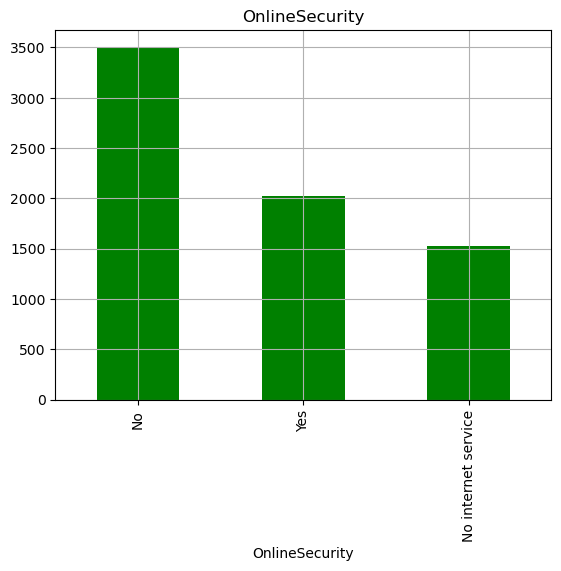

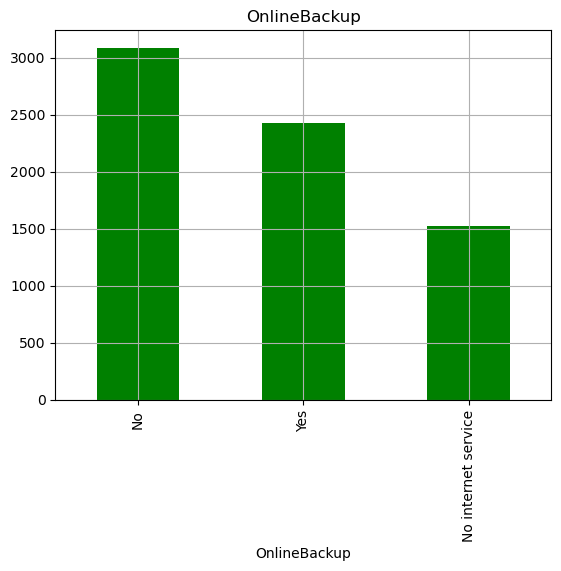

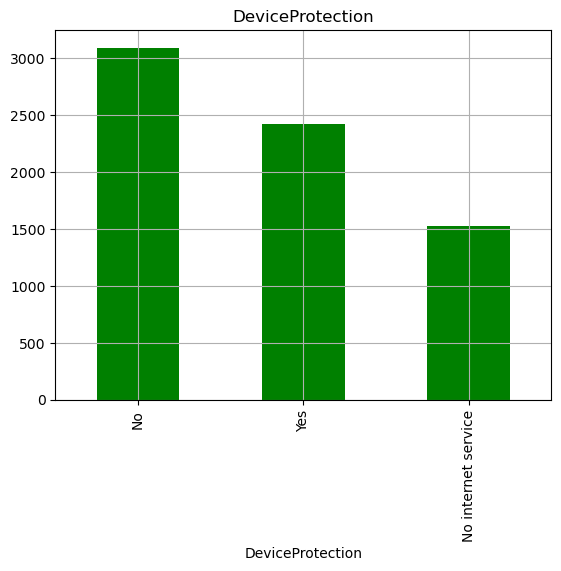

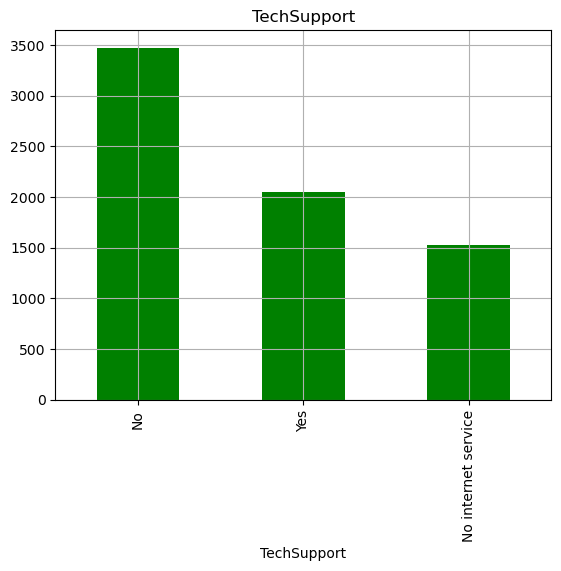

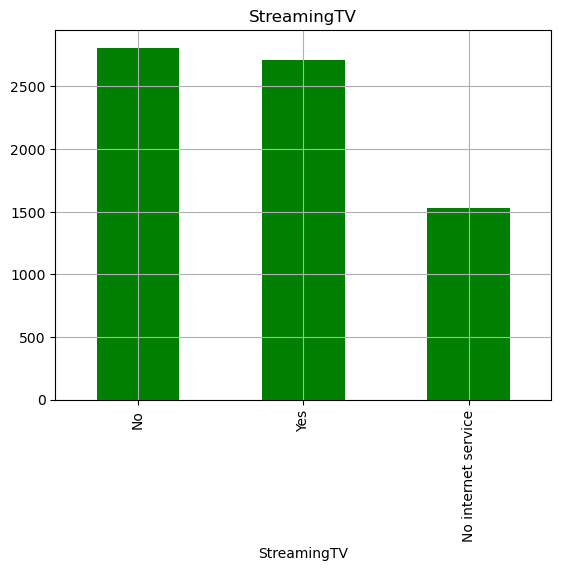

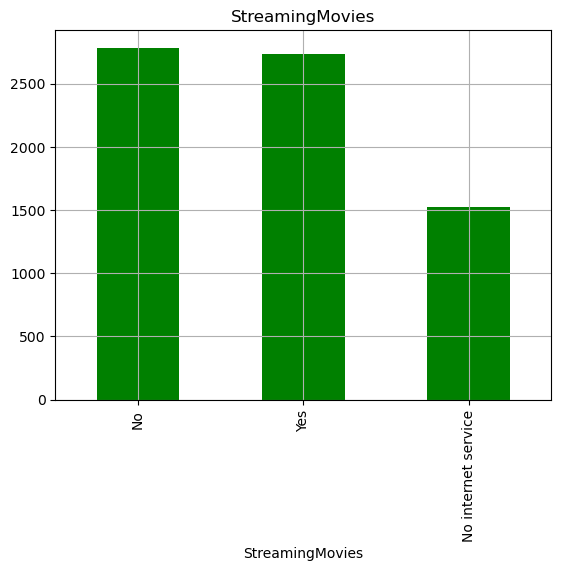

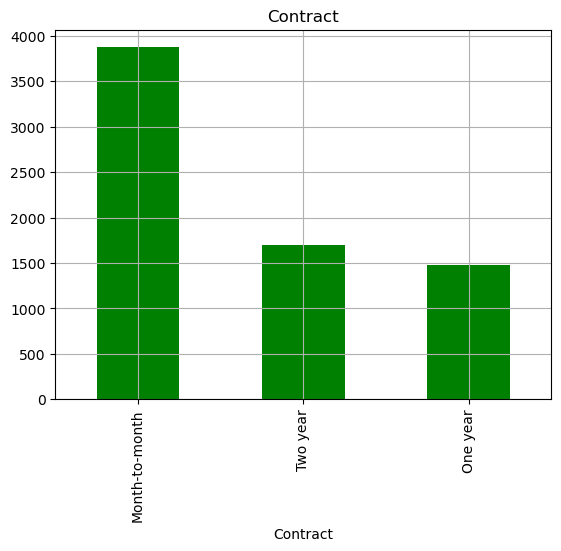

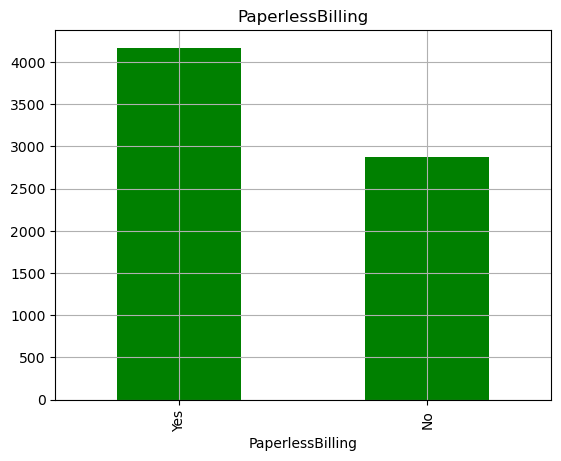

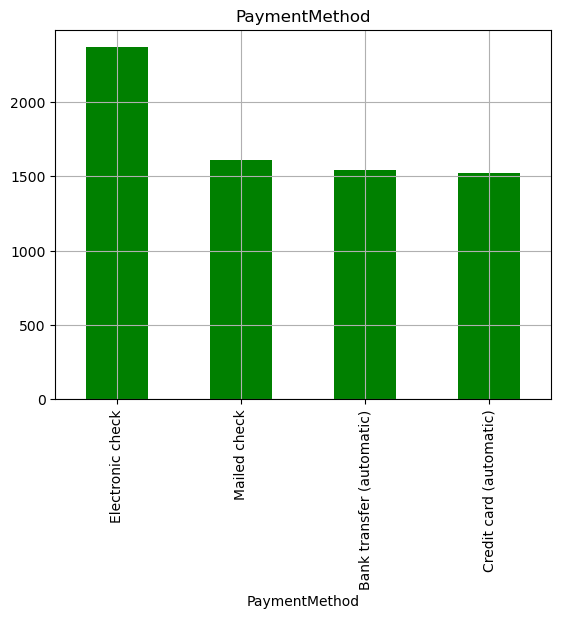

In [224]:
for f in features_cat:
    data[f].value_counts().plot(kind='bar',facecolor='green')
    plt.title(f)
    plt.grid()
    plt.show()

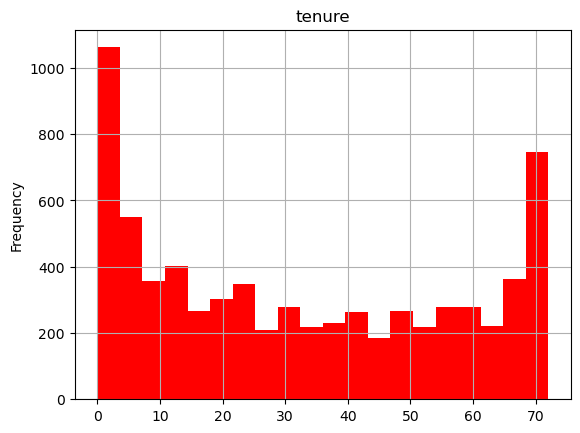

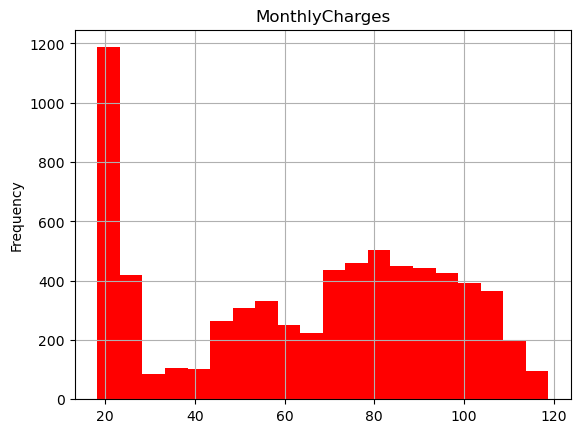

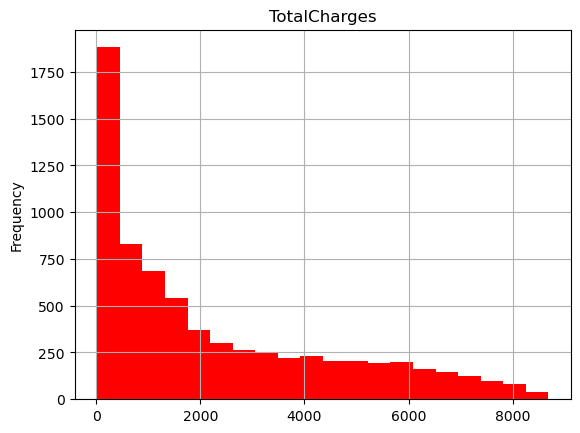

In [226]:
for f in features_num:
    data[f].plot(kind='hist',bins=20,facecolor='red')
    plt.title(f)
    plt.grid()
    plt.show()

In [228]:
predictors = features_num + features_cat
print('Number of predictors: ', len(predictors))
print(predictors)

Number of predictors:  18
['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [230]:
x=data.drop(['DeviceProtection','TechSupport','PhoneService','OnlineSecurity','OnlineBackup','MultipleLines','StreamingTV',
           'InternetService','Contract','PaymentMethod','PaperlessBilling','StreamingMovies','customerID'],axis=1)

In [232]:
lab_enc=LabelEncoder()
data1=lab_enc.fit_transform(data['gender'])
data['gender']=data1
data1=lab_enc.fit_transform(data['Partner'])
data['Partner']=data1
data1=lab_enc.fit_transform(data['Dependents'])
data['Dependents']=data1
data1=lab_enc.fit_transform(data['Dependents'])
data['Dependents']=data1
data1=lab_enc.fit_transform(data['Churn'])
data['Churn']=data1

In [274]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ..., -1.16032292,
        -0.99419409, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.25962894,
        -0.17373982, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.36266036,
        -0.95964911,  1.66382851],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -1.1686319 ,
        -0.85451414, -0.60102348],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.32033821,
        -0.87209546,  1.66382851],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.35896134,
         2.01234407, -0.60102348]])

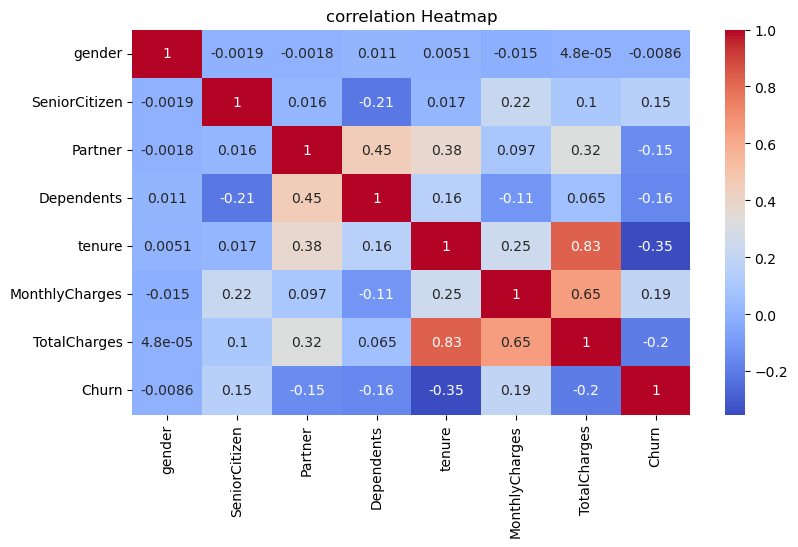

In [236]:
num_features=data.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(9,5))
sns.heatmap(data[num_features].corr(),annot=True,cmap='coolwarm')
plt.title('correlation Heatmap')
plt.show()

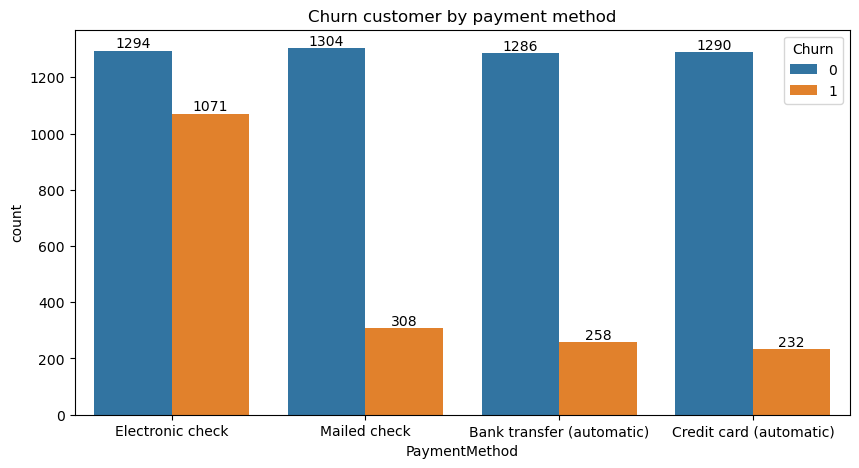

In [237]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='PaymentMethod',data=data,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churn customer by payment method')
plt.show()